In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import pairwise_distances

In [2]:
# Generate example data (blobs dataset)
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

In [3]:
# Compute negative Euclidean distance as the similarity metric (input for Affinity Propagation)
distance_matrix = pairwise_distances(X, metric='euclidean')
affinity_matrix = -distance_matrix ** 2

# Create the Affinity Propagation model
aff_prop = AffinityPropagation(affinity='precomputed')

# Fit the model to the data and obtain cluster assignments
clusters = aff_prop.fit_predict(affinity_matrix)

In [4]:
# Extract the cluster centers (exemplars)
cluster_centers_indices = aff_prop.cluster_centers_indices_
cluster_centers = X[cluster_centers_indices]

# Print the number of clusters and the cluster centers (exemplars)
n_clusters = len(cluster_centers_indices)
print(f"Number of clusters found: {n_clusters}")
print("Cluster Centers (Exemplars):")
print(cluster_centers)

Number of clusters found: 3
Cluster Centers (Exemplars):
[[-6.7930374  -7.03578683]
 [ 4.64512254  2.02015028]
 [-2.70155859  9.31583347]]


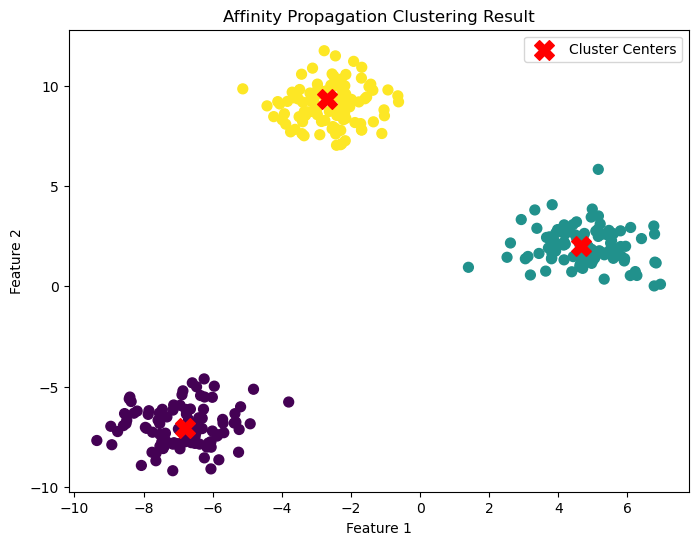

In [5]:
# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title("Affinity Propagation Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
